# Combinatorial Complexes

<center><img src="ccc.png" width=200px alt="default"/></center>


## Setup

In [1]:
from toponetx import CombinatorialComplex as cc

## Combinatorial Complex

A *combinatorial complex*, CC, combines features of both hypergraphs and of cell complexes $[1]$. A hypergraph is, as defined by $[3]$, a generalisation of a graph in which a single edge is not limited to joining just two vertices like in an ordinary graph, but can actually join multiple vertices together. CCs are both hierarchical $[4]$ and set-like, such that they have the geometric constraints of a simplicial or cellular complex $[1]$ but also invoke a hierarchy of ranks.

A CC is made up of cells, each cell has a specific rank $k$ - these cells can be referred to as $k$-cells.

### Defintion of Combinatorial Complex

$[1]$ Let S be a non-empty finite set and $\mathcal{P}(S)$ its power set. A combinatorial complex (CC) is a tuple $(X, \imath)$ formed by a set $X \subset \mathcal{P}(S)$ \ ${\emptyset}$ together with a rank function $\imath : X \rightarrow \mathbb{Z}^+$
that 

&emsp; (i) $\imath$({$x$}) $= 0$ for all $x \in S$, and 

&emsp; (ii) for all $x, y \in X$ , if $x \subsetneq y$ then $\imath (x) < \imath (y)$.

### Example of a Combinatorial Complex

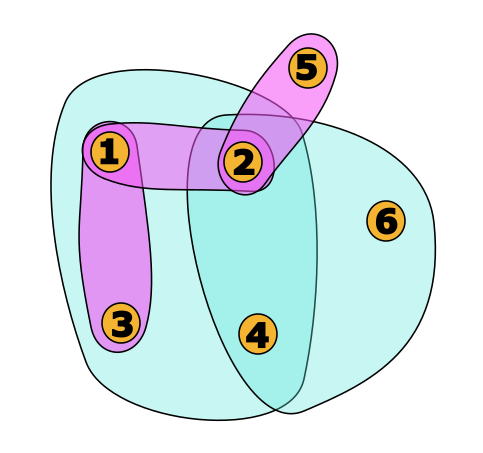

This is an example of a combinatorial complex (CC), this example has six cells of rank 0, three cells of rank 1 and two cells of rank 2. As we can see this is different to a cell comples (CX) as cells of rank 2 can contain cells of rank 0 without needing cells of rank 0 also. 

To express this example as code we may use the `add_cell` function. Examples of this can be seen below.

In [2]:
example = cc()

example.add_cell([1, 2], rank=1)
print(example)

example.add_cell([1, 3], rank=1)
print(example)

example.add_cell([1, 2, 4, 3], rank=2)
print(example)

example.add_cell([2, 5], rank=1)
print(example)

example.add_cell([2, 6, 4], rank=2)
print(example)

Combinatorial Complex with 2 nodes and cells with ranks [0, 1] and sizes [2, 1] 
Combinatorial Complex with 3 nodes and cells with ranks [0, 1] and sizes [3, 2] 
Combinatorial Complex with 4 nodes and cells with ranks [0, 1, 2] and sizes [4, 2, 1] 
Combinatorial Complex with 5 nodes and cells with ranks [0, 1, 2] and sizes [5, 3, 1] 
Combinatorial Complex with 6 nodes and cells with ranks [0, 1, 2] and sizes [6, 3, 2] 


The output of this code clearly demonstrates how the CC builds up. The first line of the output comes from adding the 1-cell $[1,2]$. This 1-cell is made up of two 0-cells - therefor the output says we have cells with ranks $[0,1]$ and these cells have sizes $[2,1]$. Sizes refers to the number of cells with that rank, so after our first line of input we have two 0-cells and one 1-cell.

Each futher line of input is adding another cell of varying rank. Finally, the last line of output is telling us that we have cells of rank 0, 1 and 2 and that they respectively have sizes of 6, 3 and 2. This is such that we have six 0-cells, three 1-cells and two 2-cells, just like our example figure does.

### Helpful Code Output

If you ever need the list of 0-cells, 1-cells or 2-cells the code below is useful for that. This utilises something called an incidence matrix which is explained later in the tutorial. Knowing the order that cells of each rank is listed in is very important when it comes to understanding the output of adjacency and incidence matrices, using this code allows you to access that information at any time.

In [3]:
row, column, B2 = example.incidence_matrix(0, 1, index=True)
row1, column1, B2 = example.incidence_matrix(1, 2, index=True)
print("rank 0:")
print(row)
print("rank 1:")
print(column)
print("rank 2:")
print(column1)

rank 0:
OrderedDict([(frozenset({1}), 0), (frozenset({2}), 1), (frozenset({3}), 2), (frozenset({4}), 3), (frozenset({5}), 4), (frozenset({6}), 5)])
rank 1:
OrderedDict([(frozenset({1, 2}), 0), (frozenset({1, 3}), 1), (frozenset({2, 5}), 2)])
rank 2:
OrderedDict([(frozenset({1, 2, 3, 4}), 0), (frozenset({2, 4, 6}), 1)])


Although at first glance this may appear confusing, once you understand the output format it is quite simple. This output is telling us that:

In the 0-cells, the $0^{th}$ cell is {1}, the $1^{st}$ cell is {2}, and so on until reaching the $5^{th}$ cell which is {6}.

In the 1-cells, the $0^{th}$ cell is {1,2}, the $1^{st}$ cell is {1,3} and the $2^{nd}$ cell is {2,5}.

In the 2-cells, the $0^{th}$ cell is {1,2,3,4} and the $1^{st}$ cell is {2,4,6}.

Comparing this information to the diagram of our example, we see that all the cells of each rank are listed, and now we also know their order. 

## Adjacency

### Adjacency Matrix

An *adjacency matrix*, is a square matrix that compares a class of objects to themselves (hence being square). Entries in an adjacency matrix are zero if they are not adjacent, and non-zero if they are adjacent $[5]$. 

$AXY(i,j) = \begin{cases}
      1 & \text{if the $i^{th}$ $X$-cell is adjacent to the $j^{th}$ $X$-cell by both being members of the same $Y$-cell }\\
      0 & \text{otherwise}
    \end{cases}     $
    
Where $X$, $Y$ are ranks such that $X < Y$.

Being 'adjacent' is defined in this context as related to each other via some higher-ranked class. Thus, when we have $n$ ranks, the number of adjacencies ,$A_n$, is defined by:

$A_n = A_{n-1} + (n-1)$ with $n \geq 2$ where $A_2 = 1$.

In our example there are 3 ranks, this means the number of adjacency matrices that we can make is 3; A01, A02, A12. Any other combination would be impossible as cells can only be adjacent via a cell of a higher rank. 

In [7]:
A01 = example.adjacency_matrix(0, 1).todense()
print(A01)

[[0 1 1 0 0 0]
 [1 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]]


As this is A01 matrix, it is comparing if 0-cells are related to other 0-cells via any 1-cells. The matrix is square, due to the fact it is comparing each 0-cell to every other 0-cell - it is not important which 1-cell they are adjacent by. Here we can see that the matrix is symmetric, this is due to the fact that the CC is not directed. 

To remind ourselves, 

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}.

Looking at the output, the $0^{th}$ row tells us that the $0^{th}$ 0-cell is adjacent to the $1^{st}$ and $2^{nd}$ 0-cells. That is, {1} is adjacent to {2} and {3} via some 1-cell. By looking at our list of 1-cells it is easy to see that {1,2} and {1,3} are the 1-cells that {1} is adjacent to {2}, {3} via. 

The $2^{nd}$ row tell us that that $2^{nd}$ 0-cell is adjacent to the $0^{th}$ 0-cell. This is such that {3} is adjacent to {1} via a 1-cell. The rest of the entries in that row are 0, which means {3} is only adjacent via a 1-cell to {1}, this is evident by looking at the diagram of our example.

In [8]:
A02 = example.adjacency_matrix(0, 2).todense()
print(A02)

[[0 1 1 1 0 0]
 [1 0 1 1 0 1]
 [1 1 0 1 0 0]
 [1 1 1 0 0 1]
 [0 0 0 0 0 0]
 [0 1 0 1 0 0]]


This is the A02 matrix, this is comparing which 0-cells are adjacent via 2-cells.

To remind ourselves,

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-2*: 0: {1,2,3,4}, 1: {2,4,6}.

Looking at the output, the $0^{th}$ row tells us that the $0^{th}$ 0-cell is adjacent to the $1^{st}$, $2^{nd}$ and $3^{rd}$ 0-cells via 2-cells. That is, {1} is adjacent to {2}, {3} and {4} via a 2-cell. Looking at our list of 2-cells or the diagram, it is obvious this is via the 2-cell {1,2,3,4}. 

The $4^{th}$ row is all zero entries, this tells us that the $4^{th}$0-cell is not incident to any other 0-cells via a 2-cell. That is, {5} is not incident to any other 0-cells via a 2-cell. Looking at the diagram, we can see this is because {5} is not involved with any 2-cells.

In [9]:
A12 = example.adjacency_matrix(1, 2).todense()
print(A12)

[[0 1 0]
 [1 0 0]
 [0 0 0]]


This is the A12 matrix, this is comparing which 1-cells are adjacent to each other via a 2-cell.

To remind ourselves,

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}

*rank-2*: 0: {1,2,3,4}, 1: {2,4,6}.

As there are three 1-cells, this matrix is a 3x3 square matrix. 

The output here can be explained in the same way. The $0^{th}$ row is showing us that the $0^{th}$ 1-cell is adjacent to the $1^{st}$ 1-cell via a 2-cell. That is, {1,2} is adjacent to {1,3} via a 2-cell - namely {1,2,3,4}.

The $1^{st}$ row is showing us that the $1^{st}$ 1-cell is adjacent to the $0^{th}$ 1-cell via a 2-cell, this is the same information as the $0^{th}$ row but simply mirrored. 

The $2^{nd}$ row is showing us that the $2^{nd}$ 1-cell is adjacent to no other 1-cells via a 2-cell. That is {2,5} is not included in any of the 2-cells. 

### Co-Adjacency Matrix

A *co-adjacency matrix* is a matrix that compares a class of objects to them selves, by seeing if they are coadjacent via some cell of a lower rank. 

That is, do the two cells in the class being compared, both fully contain the same member of a lower class? Below is two examples that might make this concept clearer.

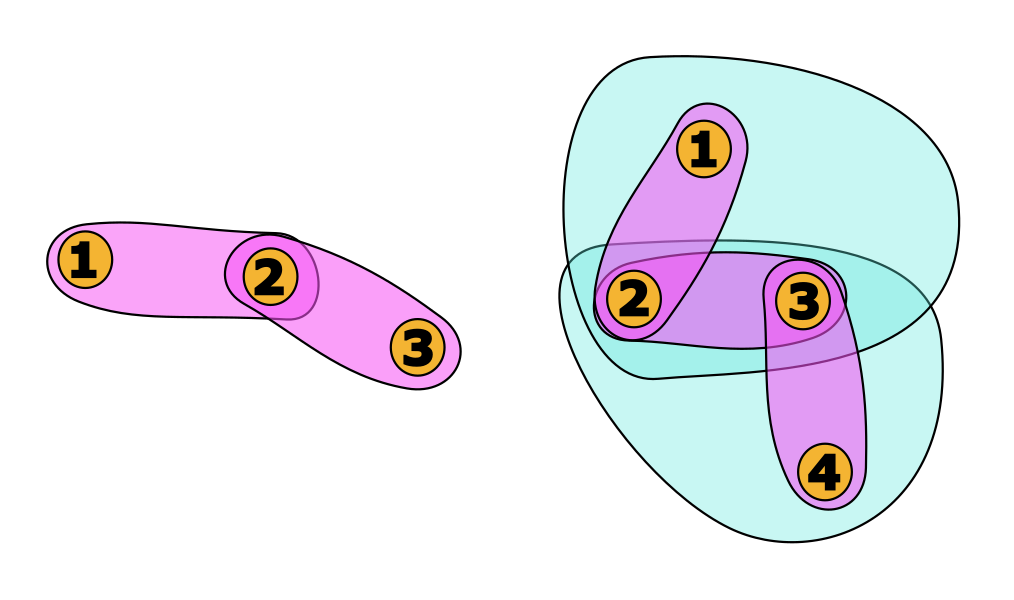

Here are two examples, made up of 0-cells (orange), 1-cells (pink) and 2-cells (blue). 

The example on the left has that the two 1-cells {1,2} and {2,3} are coadjacent via a 0-cell, which in this case is {2}. This is because both of the 1-cells contain the 0-cell {2}, thus making the 1-cells coadjacent. 

The example on the right has two 2-cells {1,2,3} and {2,3,4}, three 1-cells {1,2}, {2,3} and {3,4}, and four 0-cells {1}, {2}, {3}, {4}. The 2-cells are coadjacent via the 1-cell {2,3} and also the two 0-cells {2}, {3}; both of the 2-cells fully contain these lower rank cells. {1,2} and {2,3} are coadjacent via {2}, also {2,3} and {3,4} are coadjacent via {3}. 

Now let's compute the coadjaceny matrices, CA10, CA20 and CA21, for our original example. 

In [11]:
CA10 = example.coadjacency_matrix(1, 0).todense()
print(CA10)

[[0 1 1]
 [1 0 0]
 [1 0 0]]


The CA10 matrix, sees if 1-cells are coadjacent via any shared 0-cells.

To remind ourselves,

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}.

The matrix's $0^{th}$ row shows us that {1,2} is coadjacent to {1,3} and {2,5} via some 0-cells. In this case we can see that {1,2} is coadjacent to {1,3} by the 0-cell {1} and is coadjacent to {2,5} by the 0-cell {2}.  

In [12]:
CA20 = example.coadjacency_matrix(2, 0).todense()
print(CA20)

[[0 1]
 [1 0]]


The CA20 matrix sees if any 2-cells are coadjacent via any shared 0-cells.

To remind ourselves, 

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-2*: 0: {1,2,3,4}, 1: {2,4,6}.

CA20's $0^{th}$ row tells us that {1,2,3,4} is coadjacent to {2,4,6} via a 0-cell. Here we can see they both share the 0-cell {2}.

This information is then repeated in the mirrored direction in the $1^{st}$ row. 

In [15]:
CA21 = example.coadjacency_matrix(2, 1).todense()
print(CA21)

[[0 0]
 [0 0]]


The CA21 matrix compares if any 2-cells are coadjacent via a 1-cell. 

All of the entries in this matrix are zero, which tells us that no 2-cells are coadjacent via a 1-cell.

To remind ourselves, 

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}

*rank-2*: 0: {1,2,3,4}, 1: {2,4,6}.

Looking at these cells it is clear that both 2-cells do not share any 1-cells, given that {2,4,6} does nto fully contain a 1-cell this is inevitable. 

## Incidence

### Incidence Matrix

An *incidence matrix* is a matrix that shows the relationship between two classes of objects. If the first class is X and the second is Y, the matrix has one row for each element of X and one column for each element of Y. The entry in row x and column y is 1 if x and y are related (called incident in this context) and 0 if they are not $[2]$.

$BXY(i,j) = \begin{cases}
      1 & \text{if the $i^{th}$ X-cell is contained in, but not equal to, the $j^{th}$ Y-cell}\\
      0 & \text{otherwise.}
    \end{cases}     $

For combinatorial complexes, we compare cells of a rank to cells of a higher rank. So for our example, as we only have three ranks we have three possible incidence matrices: B01, B02 and B12. 

In [16]:
B01 = example.incidence_matrix(0, 1).todense()
print(B01)

[[1 1 0]
 [1 0 1]
 [0 1 0]
 [0 0 0]
 [0 0 1]
 [0 0 0]]


B01 is the incidence matrix portraying which 0-cells are incident to which 1-cells. 

To remind ourselves, 

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}.

So in this matrix, each row represents one of the six 0-cells, and each column represents one of the three 1-cells. 

The 0$^{th}$ row of this matrix is showing us that the $0^{th}$ 0-cell, {1}, is incident to the $0^{th}$ and $1^{st}$ 1-cells {1,2} and {1,3}. This is because {1} is contained in both {1,2} and {1,3}. The entry $[0,2]$ of this matrix is zero, which tells us that the $2^{nd}$ 1-cell {2,5} is not incident to {1} - a trivial fact when looking at the cells. 

The 3$^{rd}$ row of this matrix only contains entries of value zero. This shows us that {4} is not incident to any of the 1-cells. 

In [17]:
B02 = example.incidence_matrix(0, 2).todense()
print(B02)

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]]


B02 is the incidence matrix demonstrating which 0-cells are incident to which 2-cells.

To remind ourselves,

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-2*: 0: {1,2,3,4}, 1: {2,4,6}.

In this marix, each row represents one of the six 0-cells, and each column represents one of the two 2-cells. 

The $0^{th}$ row has a non-zero entry for the $0^{th}$ column and a zero entry for the $1^{st}$ column. This tells us that {1} is incident to {1,2,3,4} but is not incident to {2,4,6}. This is because {1} is not contained in {2,4,6}.

In [18]:
B12 = example.incidence_matrix(1, 2).todense()
print(B12)

[[1 0]
 [1 0]
 [0 0]]


B12 is the incidence matrix demonstrating which 1-cells are incident to which 2-cells. 

To remind ourselves, 

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}

*rank-2*: 0: {1,2,3,4}, 1: {2,4,6}.

The $0^{th}$ row tells us that {1,2} is incident to {1,2,3,4} but is not incident to {2,4,6}. The $1^{st}$ row tells us that {1,3} is incident to {1,2,3,4} but is not incident to {2,4,6}. The $3^{rd}$ row tells us that {2,5} is not incident to {1,2,3,4} or {2,4,6}.

## References

$[1]$ : Hajij, M., Zamzmi, G., Papamarkou, T., Miolane, N., Guzmán-Sáenz, A. and Ramamurthy, K. (n.d.). *Higher-Order Attention Networks*. [online] Available at: https://arxiv.org/pdf/2206.00606.pdf [Accessed 3 Apr. 2023].

$[2]$ : www.scientificlib.com. (n.d.). *Incidence matrix*. [online] Available at: http://www.scientificlib.com/en/Mathematics/LX/IncidenceMatrix.html. [Accessed 3 Jan. 2023].

$[3]$ : Wikipedia. (2023). *Hypergraph*. [online] Available at: https://en.wikipedia.org/wiki/Hypergraph [Accessed 5 Apr. 2023].

$[4]$ : Wikipedia. (2023). *Hierarchy (mathematics)*. [online] Available at: https://en.wikipedia.org/wiki/Hierarchy_(mathematics) [Accessed 5 Apr. 2023].

$[5]$ : www.sciencedirect.com. (n.d.). *Adjacency Matrix - an overview | ScienceDirect Topics*. [online] Available at: https://www.sciencedirect.com/topics/mathematics/adjacency-matrix#:~:text=The%20adjacency%20matrix%20of%20a [Accessed 5 Apr. 2023].

‌